In [658]:
import numpy as np
import pandas as pd

In [659]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [660]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
321,ham,Hey... Why dont we just go watch x men and hav...,NaN,NaN,NaN
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
4591,ham,Right it wasnt you who phoned it was someone w...,NaN,NaN,NaN
2467,ham,Is there coming friday is leave for pongal?do ...,NaN,NaN,NaN
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha...",NaN,NaN,NaN
3018,ham,Wat time do u wan 2 meet me later?,NaN,NaN,NaN
1791,ham,U havenåÕt lost me ill always b here 4u.i didn...,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
2938,ham,Are you ok. What happen to behave like this,NaN,NaN,NaN
938,spam,Urgent! call 09061749602 from Landline. Your c...,NaN,NaN,NaN


In [661]:
df.shape

(5572, 5)

Stages of the projects:
1. Data Cleaning
2. EDA
3. Text Preprocesssing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## 1. Data Cleaning

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [663]:
# Drop the last three columns.
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [664]:
df.sample(10)

,v1,v2
1841,ham,I am in your office na.
4112,ham,Thought we could go out for dinner. I'll treat...
1743,ham,I love to wine and dine my lady!
2134,ham,If he started searching he will get job in few...
3299,ham,Just do what ever is easier for you
897,ham,I'm used to it. I just hope my agents don't dr...
2640,ham,Pandy joined 4w technologies today.he got job..
4075,spam,87077: Kick off a new season with 2wks FREE go...
1680,ham,Okay... We wait ah
3295,ham,Hi there. We have now moved in2 our pub . Woul...


In [665]:
# Rename the columns.
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(10)

,target,text
4195,ham,"Sorry, it's a lot of friend-of-a-friend stuff,..."
1081,ham,Can u get pic msgs to your phone?
2151,ham,I surely dont forgot to come:)i will always be...
3406,ham,Beautiful Truth against Gravity.. Read careful...
3803,ham,"No dude, its not fake..my frnds got money, tht..."
3778,spam,"Claim a 200 shopping spree, just call 08717895..."
1198,ham,Al he does is moan at me if n e thin goes wron...
3680,ham,LOL what happens in Vegas stays in vegas
1890,ham,Ok but knackered. Just came home and went to s...
2357,ham,Okay same with me. Well thanks for the clarifi...


In [666]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [667]:
df['target']=encoder.fit_transform(df['target'])

In [668]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [669]:
# Check missing values.
df.isnull().sum()

target    0
text      0
dtype: int64

In [670]:
# Check duplicate values.
df.duplicated().sum()

403

In [671]:
# Remove duplicate values.
df = df.drop_duplicates(keep='first')

In [672]:
df.duplicated().sum()

0

In [673]:
df.shape

(5169, 2)

## 2. EDA(Exploratory Data Analysis)

In [674]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [675]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

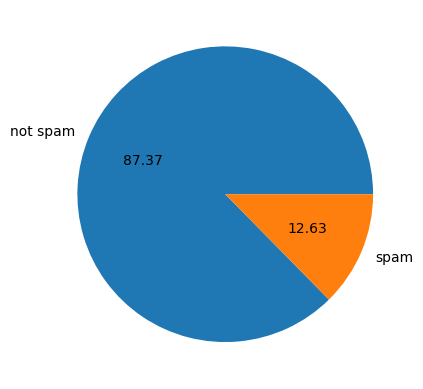

In [676]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['not spam', 'spam'], autopct="%0.2f")
plt.show()

In [677]:
# Data is imbalanced.

In [678]:
import nltk

In [679]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [680]:
# Fetch number of characters in the message.
df['num_characters'] = df['text'].apply(len)

In [681]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [682]:
# Fetch number of words.
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [683]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [684]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [685]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [686]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [687]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [688]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.00,5169.00,5169.00
mean,78.98,18.45,1.95
std,58.24,13.32,1.36
min,2.00,1.00,1.00
25%,36.00,9.00,1.00
50%,60.00,15.00,1.00
75%,117.00,26.00,2.00
max,910.00,220.00,28.00


In [689]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.00,4516.00,4516.00
mean,70.46,17.12,1.80
std,56.36,13.49,1.28
min,2.00,1.00,1.00
25%,34.00,8.00,1.00
50%,52.00,13.00,1.00
75%,90.00,22.00,2.00
max,910.00,220.00,28.00


In [690]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.00,653.00,653.00
mean,137.89,27.67,2.97
std,30.14,7.01,1.48
min,13.00,2.00,1.00
25%,132.00,25.00,2.00
50%,149.00,29.00,3.00
75%,157.00,32.00,4.00
max,224.00,46.00,8.00


In [691]:
# Plot histogram.
import seaborn as sns

In [692]:
df[df['target'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

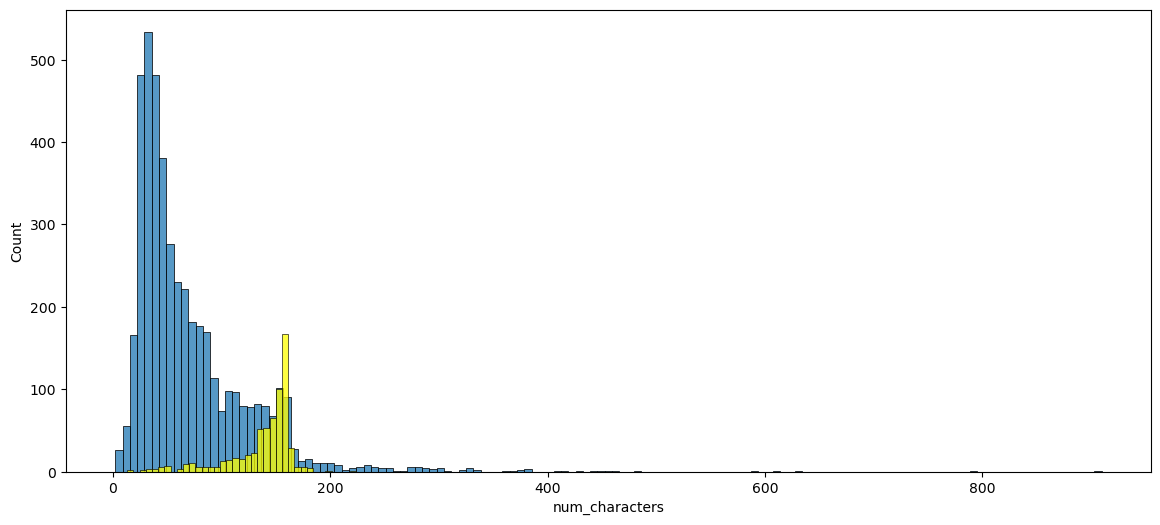

In [693]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='yellow')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

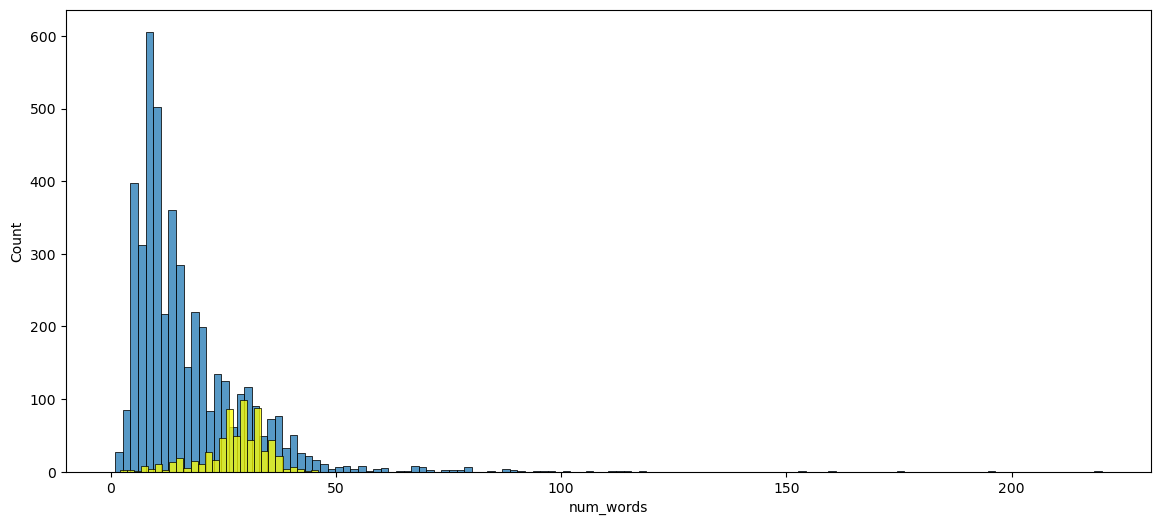

In [694]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='yellow')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

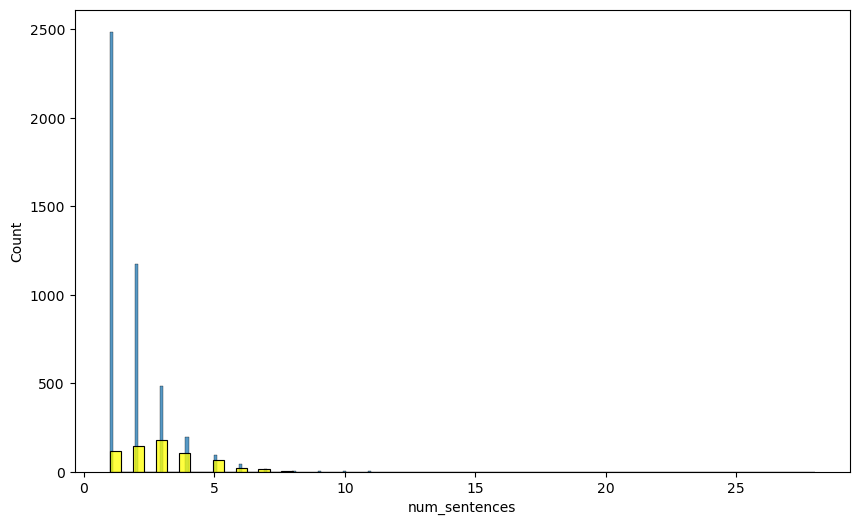

In [695]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='yellow')

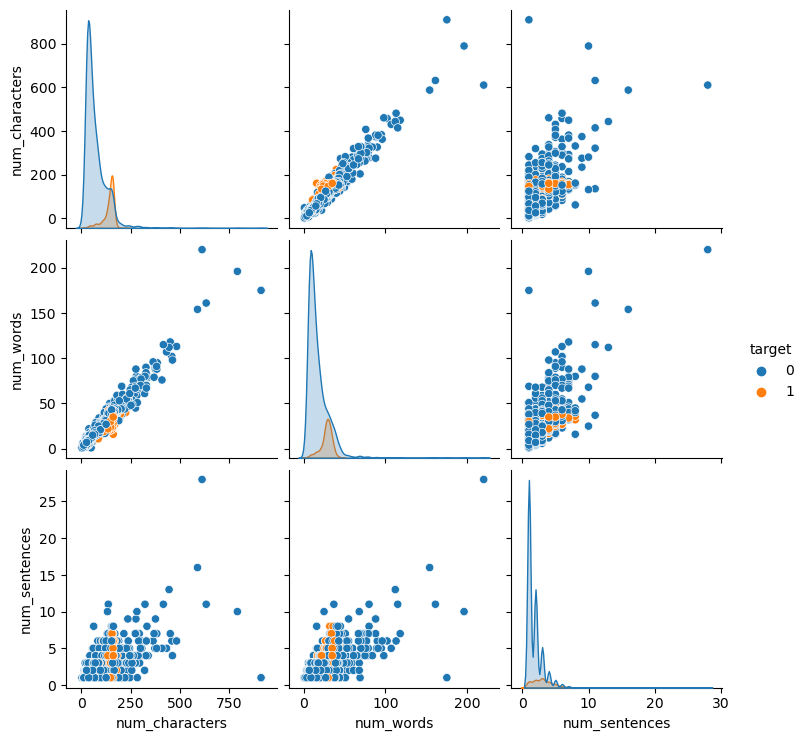

In [696]:
sns.pairplot(df,hue='target')

In [697]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.00,0.38,0.26,0.28
num_characters,0.38,1.00,0.97,0.64
num_words,0.26,0.97,1.00,0.68
num_sentences,0.28,0.64,0.68,1.00


<AxesSubplot:>

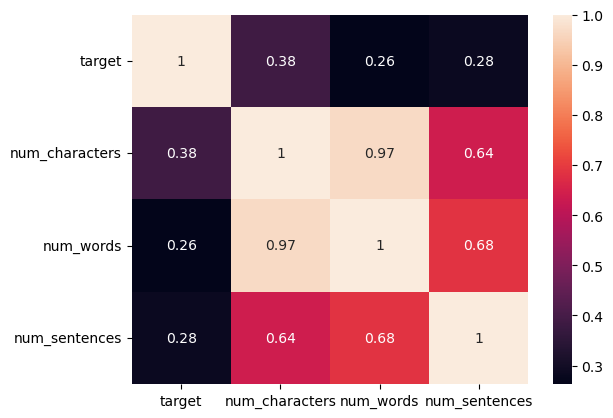

In [698]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
    (Textual data)
     a. Lower case
     b. Tokenization
     c. Removing special characters
     d. Removing stop words and punctutation
     e. Stemming or lemitization (Dancing dances dance all are same)

In [699]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [700]:
# To import punctuation from the module string
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [701]:
# For stemming required library
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loved')

'love'

In [702]:
def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [703]:
transform_text('AllhaMdulillah All ikrg 4^5* *7 98  Wells loved lsdk salary in %&&^%')

'allhamdulillah ikrg 7 98 well love lsdk salari'

In [704]:
df['transformed_text'] = df['text'].apply(transform_text)

In [705]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [706]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [707]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

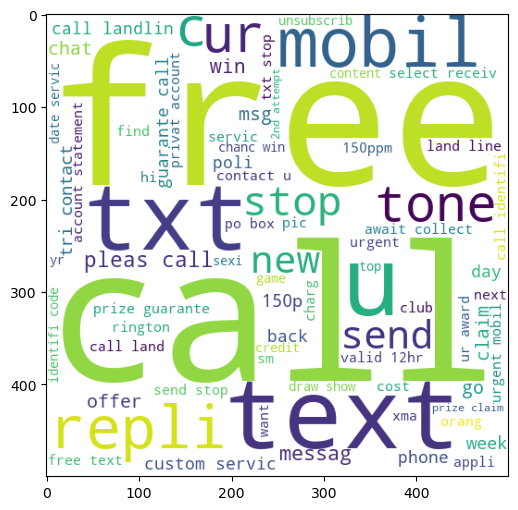

In [708]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [709]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

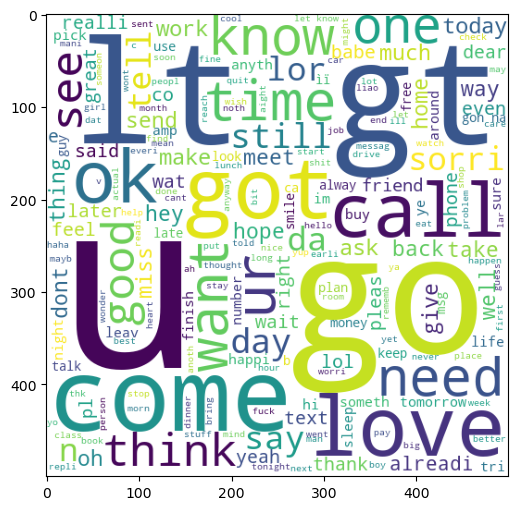

In [710]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [711]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [712]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [713]:
len(spam_corpus)

9939

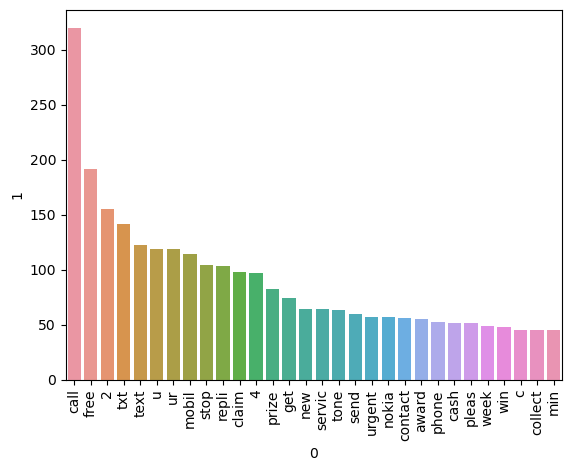

In [714]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [715]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [716]:
len(ham_corpus)

35394

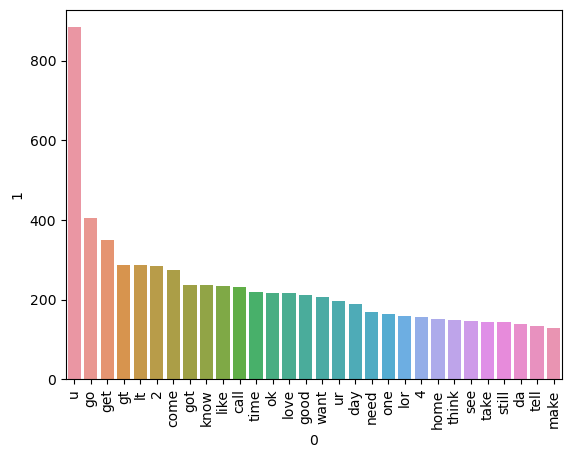

In [717]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [718]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [719]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4500)

In [720]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [721]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Training the model with TFidf vectorizer.

In [722]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [723]:
X.shape

(5169, 4500)

In [724]:
y = df['target'].values

In [725]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [726]:
from sklearn.model_selection import train_test_split

In [727]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [728]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [729]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9671179883945842
[[896   0]
 [ 34 104]]
1.0


In [730]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9806576402321083
[[896   0]
 [ 20 118]]
1.0


In [731]:
# tfidf --> BNB

In [732]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [733]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =  BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [734]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : bnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [735]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [736]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9745762711864406)

In [737]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Accuracy - " , current_accuracy)
    print("Precision - " , current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9535783365570599
Precision -  0.95
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  NB
Accuracy -  0.9806576402321083
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9056603773584906
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9327731092436975


In [738]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [739]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.98,1.00
4,KN,0.90,1.00
8,ETC,0.98,0.98
5,RF,0.97,0.98
1,SVC,0.97,0.97
6,AdaBoost,0.97,0.96
0,LR,0.95,0.95
10,xgb,0.97,0.93
9,GBDT,0.95,0.91
7,BgC,0.96,0.86


In [740]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [741]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.98
1,KN,Accuracy,0.90
2,ETC,Accuracy,0.98
3,RF,Accuracy,0.97
4,SVC,Accuracy,0.97
5,AdaBoost,Accuracy,0.97
6,LR,Accuracy,0.95
7,xgb,Accuracy,0.97
8,GBDT,Accuracy,0.95
9,BgC,Accuracy,0.96


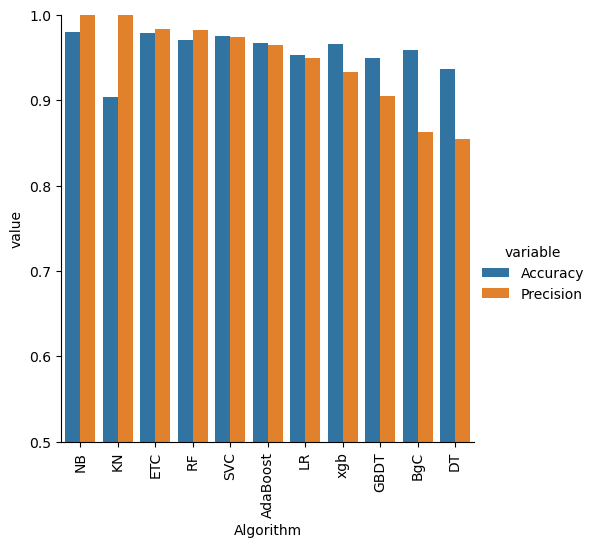

In [742]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Improvement

In [743]:
# model improvement
# 1. Change the max_feature parameter of TfIdf

In [744]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [745]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [746]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [747]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [655]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [656]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y
0,NB,0.98,1.00,0.98,1.00,0.98,1.00,0.98,1.00
1,KN,0.90,1.00,0.90,1.00,0.90,1.00,0.90,1.00
2,ETC,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
3,RF,0.97,0.98,0.97,0.98,0.97,0.98,0.97,0.98
4,AdaBoost,0.97,0.96,0.97,0.96,0.97,0.96,0.97,0.96
5,LR,0.97,0.96,0.97,0.96,0.97,0.96,0.97,0.96
6,xgb,0.97,0.93,0.97,0.93,0.97,0.93,0.97,0.93
7,SVC,0.97,0.92,0.97,0.92,0.97,0.92,0.97,0.92
8,GBDT,0.95,0.91,0.95,0.91,0.95,0.91,0.95,0.91
9,BgC,0.96,0.86,0.96,0.86,0.96,0.86,0.96,0.86


In [649]:
import lazypredict

In [650]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [37:49<00:00, 78.26s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.98               0.94     0.94      0.98   
PassiveAggressiveClassifier        0.97               0.93     0.93      0.97   
BernoulliNB                        0.98               0.93     0.93      0.98   
LGBMClassifier                     0.97               0.93     0.93      0.97   
LinearSVC                          0.96               0.93     0.93      0.96   
XGBClassifier                      0.97               0.92     0.92      0.97   
RandomForestClassifier             0.98               0.91     0.91      0.97   
NearestCentroid                    0.97               0.91     0.91      0.97   
Perceptron                         0.94               0.90     0.90      0.94   
BaggingClassifier                  0.96               0.89     0.89      0.95   
DecisionTreeClassifier      

In [749]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))